In [7]:
%matplotlib inline

import matplotlib.pyplot as plt
from astropy import units as u
from astropy.io import fits
from astropy.coordinates import SkyCoord
from astropy.wcs import WCS
from astropy.visualization import simple_norm
import matplotlib.pyplot as plt

SyntaxError: invalid syntax (<ipython-input-7-dc0708fde5a3>, line 2)


<section class="challenge panel panel-success">
<div class="panel-heading">
<h2><span class="fa fa-pencil"></span> Challenge</h2>
</div>


<div class="panel-body">

<p>Find the position of all the stars in the <a href="data/gaia_lmc_psc.fits">data/gaia_lmc_psc.fits</a> catalog in pixel coordinates, and overplot them on the image (you'll need to use things we have learned in previous tutorials).</p>

</div>

</section>


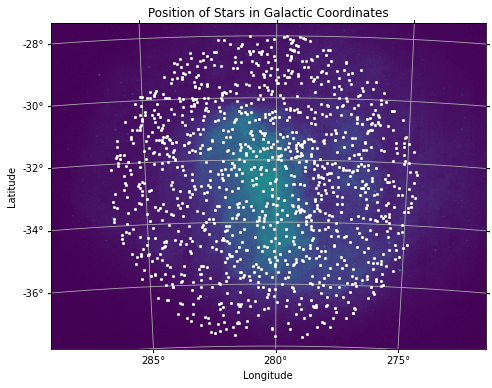

In [2]:
plt.rc('image', origin='lower')
plt.rc('figure', figsize=(10, 6))

# Challenge:
# Find the position of all the stars in the data/gaia_lmc_psc.fits catalog in pixel coordinates, and overplot them on the image (you'll need to use things we have learned in previous tutorials).
hduImage = fits.open('data/LMCDensFits1k.fits')
wcsImage = WCS(hduImage[0].header)
hduGaia = fits.open('data/gaia_lmc_psc.fits')
wcsGaia = WCS(hduGaia[1].header)
ra = hduGaia[1].data['ra']
dec = hduGaia[1].data['dec']
starz = SkyCoord(ra*u.deg, dec*u.deg)
starzOverplot = wcsImage.world_to_pixel(starz)
ax = plt.subplot(projection=wcsImage)
ax.imshow(hduImage[0].data);
ax.plot(starzOverplot[0], starzOverplot[1], 'wo', markersize=2);
lon = ax.coords[0]
lat = ax.coords[1]
lon.set_axislabel("Longitude")
lat.set_axislabel("Latitude")
ax.grid()
plt.title("Position of Stars in Galactic Coordinates")
plt.show()


<section class="challenge panel panel-success">
<div class="panel-heading">
<h2><span class="fa fa-pencil"></span> Challenge</h2>
</div>


<div class="panel-body">

<ol>
<li>Make a figure of the IRAS data used above, with the GAIA source density map shown as a contour (note that you might need to smooth the GAIA source density image - check the <a href="https://docs.scipy.org/doc/scipy/reference/ndimage.html">scipy.ndimage</a> module for some useful functions!)</li>
<li>Add the positions of the GAIA sources from the table used in previous tutorials to the image</li>
<li>If you have FITS images available, try this out with your own data!</li>
</ol>

</div>

</section>


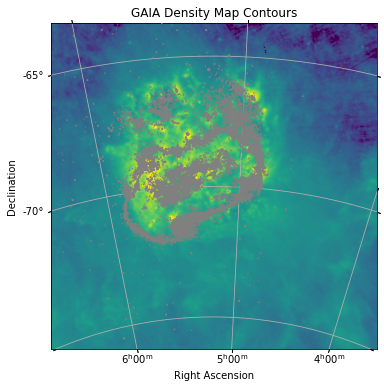

In [3]:
hduIras = fits.open('data/ISSA_100_LMC.fits')
wcsIras = WCS(hduIras[0].header)
log_norm = simple_norm(hduIras[0].data, stretch = 'log', percent=99.5)
ax = plt.subplot(projection=wcsIras)
ra = ax.coords[0]
dec = ax.coords[1]
ax.imshow(hduIras[0].data, norm = log_norm);
ax.contour(hduImage[0].data, transform=ax.get_transform(wcsImage), colors = 'grey', levels=[50, 100, 250, 500]);
ax.set_xlim(-0.5, 501.5);
ax.set_ylim(-0.5, 501);
plt.title("GAIA Density Map Contours")
ra.set_axislabel("Right Ascension")
dec.set_axislabel("Declination")
ax.grid()
plt.show()

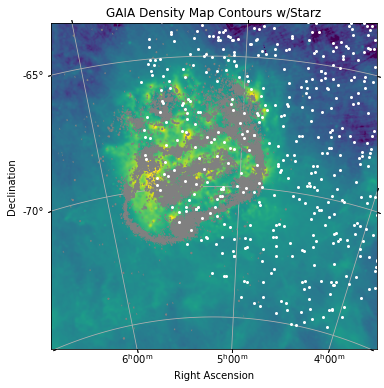

In [4]:
ax = plt.subplot(projection=wcsIras)
ra = ax.coords[0]
dec = ax.coords[1]
ra.set_axislabel("Right Ascension")
dec.set_axislabel("Declination")
ax.imshow(hduIras[0].data, norm = log_norm);
ax.contour(hduImage[0].data, transform=ax.get_transform(wcsImage), colors = 'grey', levels=[50, 100, 250, 500]);
ax.plot(starzOverplot[0], starzOverplot[1], 'wo', markersize=2);
plt.title("GAIA Density Map Contours w/Starz")
ax.set_xlim(-0.5, 501.5);
ax.set_ylim(-0.5, 501);
ax.grid()
plt.show()

In [5]:
#Sadly as I primarily study aeronautics, I do not have any of my own to try :(